In [ ]:
import requests
import csv
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Set to directory with files
# os.chdir('MY DIRECTORY')

# Append dataframes from each file here.
data_frames = []

# Loop through all files in the current directory
for filename in os.listdir():
    # Only read in CSV files
    if filename.endswith('.csv'):
        try:
            # Read the CSV file into a DataFrame
            df = pd.read_csv(filename)
            # Append the DataFrame to the list
            data_frames.append(df)
            print(f"Successfully read {filename}")
        except Exception as e:
            print(f"Failed to read {filename}: {e}")

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)
print("All CSV files have been combined into 'combined_data.csv'")

Successfully read DC_output.csv
Successfully read Columbia_output.csv
Successfully read Indianapolis_output.csv
Successfully read Atlanta_output.csv
Successfully read NYC_output.csv
Successfully read Boston_output.csv
Successfully read Raleigh_output.csv
Successfully read Houston_output.csv
All CSV files have been combined into 'combined_data.csv'


In [ ]:
# Use PCA to reduce the 5 dimensions into 3 dimensional space
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Read data from combined dataset
data = pd.read_csv('combined_data.csv')
X = data.iloc[:, 5:10]

# Apply PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Scale the resulting PCA components to fit within RGB range [0, 255]
scaler = MinMaxScaler(feature_range=(0, 255))
X_scaled = scaler.fit_transform(X_pca)

# Convert the scaled result to integers
X_rgb = X_scaled.astype(int)

# Add values within X_rgb to a new column of data
data['RGB'] = [tuple(rgb) for rgb in X_rgb]

# Remove 5 dimensional features (original features) from data
data.drop(data.columns[5:10], axis=1, inplace=True)

# Output file name
output_filename = "combined_RGB.csv"

# Write data with RGB vectors to output file name
data.to_csv(output_filename)

In [ ]:
import numpy as np

# Now let's read in the combined_RGB file
data = pd.read_csv("combined_RGB.csv")

# Group data by date and reference location (time series for each location)
grouped = data.groupby(['Date', 'Reference'])

### Proof of concept. This will need to be wrapped into a single function for all timepoints for all locations in final model ###

# Set a group manually
group = grouped.get_group((20000101, "Atlanta"))

# Sort group by neighbor numbers to make it easier to plot on a grid
sorted_group = group.sort_values(by='Neighbor Number', ascending=True)
sorted_group

,Date,Neighbor Number,Reference,Latitude,Longitude,RGB,FROST
235228,20000101,1,Atlanta,34.2501,-83.7635,"(105, 62, 119)",0
243629,20000101,2,Atlanta,34.7501,-83.7635,"(111, 65, 113)",0
252030,20000101,3,Atlanta,35.2501,-83.7635,"(109, 96, 128)",0
260431,20000101,4,Atlanta,34.2501,-84.3885,"(103, 68, 115)",0
226827,20000101,5,Atlanta,34.7501,-84.3885,"(102, 69, 120)",0
268832,20000101,6,Atlanta,35.2501,-84.3885,"(98, 66, 137)",0
277233,20000101,7,Atlanta,34.2501,-85.0135,"(97, 57, 136)",0
285634,20000101,8,Atlanta,34.7501,-85.0135,"(99, 58, 132)",0
294035,20000101,9,Atlanta,35.2501,-85.0135,"(104, 57, 128)",0


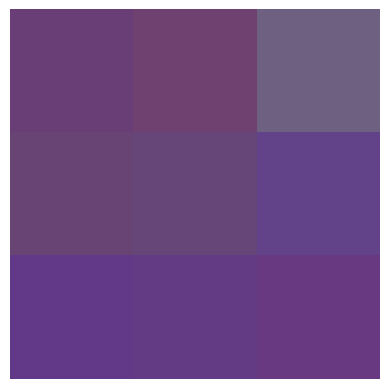

In [ ]:
import matplotlib.pyplot as plt

# Now that we have the sorted neighbors for the given group, we can paint the tiles on our 3x3 grid
rgb_values = sorted_group['RGB'].apply(eval).tolist()
# Reshape into 3x3 grid for R, G, and B integer values
rgb_grid = np.array(rgb_values).reshape(3, 3, 3)

# Create and show the image - the 3x3 grid of pixels
plt.imshow(rgb_grid)
plt.axis('off')
plt.show()

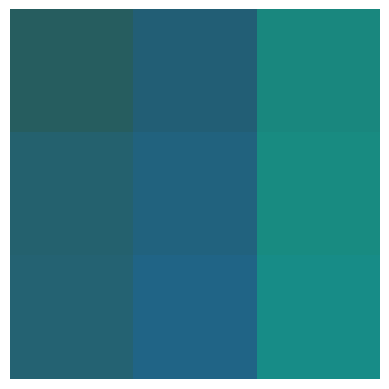

In [ ]:
# Try for a different group, Houston, in summer
group = grouped.get_group((20080704, "Houston"))

sorted_group = group.sort_values(by='Neighbor Number', ascending=True)

rgb_values = sorted_group['RGB'].apply(eval).tolist()
rgb_grid = np.array(rgb_values).reshape(3, 3, 3)  # Reshape into 3x3 grid with 3 color channels

# Create and show the image (3x3 grid of pixels)
plt.imshow(rgb_grid)
plt.axis('off')  # Hide axes for better display
plt.show()

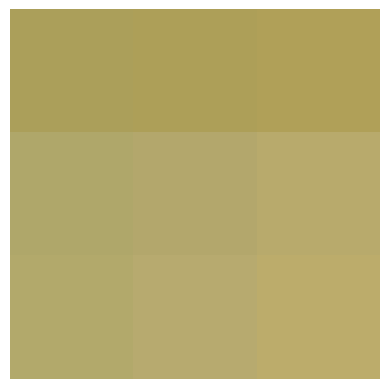

In [ ]:
# Try for a different group, Houston, in summer
group = grouped.get_group((20100204, "Boston"))

sorted_group = group.sort_values(by='Neighbor Number', ascending=True)

rgb_values = sorted_group['RGB'].apply(eval).tolist()
rgb_grid = np.array(rgb_values).reshape(3, 3, 3)  # Reshape into 3x3 grid with 3 color channels

# Create and show the image (3x3 grid of pixels)
plt.imshow(rgb_grid)
plt.axis('off')  # Hide axes for better display
plt.show()